In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#removed the 2nd line in the excel
df = pd.read_excel(r'C:\Users\Yann Boulben\Downloads\Data_Project1.xlsx', sheet_name='Financials', skiprows=1, parse_dates=[0], index_col=0)
# Rename columns for clarity
df.rename(columns={'U:MA(P#T)': 'MASTERCARD', 'U:GS(P#T)': 'GOLDMAN SACHS', 'U:AXP(P#T)': 'AMERICAN EXPRESS', 'U:MS(P#T)': 'MORGAN STANLEY', 'U:V(P#T)': 'VISA'}, inplace=True)

#rename the index "Date"
df.index.rename('Date', inplace=True)

# Correct calculation and storage for daily simple returns
df_simple_returns = pd.DataFrame()  # Initialize a new DataFrame for simple returns
for company in ['MASTERCARD', 'GOLDMAN SACHS', 'AMERICAN EXPRESS', 'MORGAN STANLEY', 'VISA']:
    df_simple_returns[company] = df[company].pct_change()

df_simple_returns


,MASTERCARD,GOLDMAN SACHS,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.001580,-0.002087,-0.014108,-0.010523,-0.007500
2014-01-03,-0.003993,0.007123,0.003242,0.015469,0.000679
2014-01-06,-0.004958,0.006848,-0.000446,0.003491,-0.006014
2014-01-07,0.012580,-0.006021,-0.003790,-0.003163,0.007642
...,...,...,...,...,...
2024-01-29,0.004675,0.007332,-0.002830,-0.001254,0.021348
2024-01-30,0.010463,0.016581,0.016380,0.000000,0.012753
2024-01-31,0.009075,-0.007393,-0.016703,-0.004337,-0.014035


In [225]:
# Number of trading days in a year
trading_days = 365

# Initialize a dictionary to store the descriptive statistics
descriptive_stats = {}

# Calculate descriptive statistics for daily returns
for company in ['MASTERCARD', 'GOLDMAN SACHS', 'AMERICAN EXPRESS', 'MORGAN STANLEY', 'VISA']:
    returns = df_simple_returns[f'{company}']
    descriptive_stats[company] = {
        'Annualized Mean': returns.mean() * trading_days,
        'Annualized Variance': returns.var() * trading_days,
        'Skewness': returns.skew(),
        'Kurtosis': returns.kurtosis(),
        'Min': returns.min(),
        'Max': returns.max()
    }

# Convert the dictionary to a DataFrame for easier viewing
df_descriptive_daily_stats = pd.DataFrame(descriptive_stats)

df_descriptive_daily_stats


,MASTERCARD,GOLDMAN SACHS,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Annualized Mean,0.288422,0.163804,0.178005,0.208469,0.265136
Annualized Variance,0.103527,0.110434,0.129420,0.133458,0.085146
Skewness,0.313011,0.122822,1.156354,0.402272,0.301008
Kurtosis,9.980057,10.562240,24.149809,13.276885,10.460882
Min,-0.127255,-0.127053,-0.148187,-0.156000,-0.135472
Max,0.166109,0.175803,0.218823,0.197700,0.138426


In [226]:
# Now, calculate daily log returns correctly
df_log_returns = pd.DataFrame()  # Initialize a new DataFrame for log returns
for company in ['MASTERCARD', 'GOLDMAN SACHS', 'AMERICAN EXPRESS', 'MORGAN STANLEY', 'VISA']:
    df_log_returns[company] = np.log(df[company] / df[company].shift(1))

df_log_returns


,MASTERCARD,GOLDMAN SACHS,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.001581,-0.002090,-0.014208,-0.010579,-0.007528
2014-01-03,-0.004001,0.007098,0.003237,0.015350,0.000678
2014-01-06,-0.004970,0.006825,-0.000446,0.003485,-0.006032
2014-01-07,0.012502,-0.006039,-0.003798,-0.003168,0.007613
...,...,...,...,...,...
2024-01-29,0.004664,0.007306,-0.002834,-0.001255,0.021123
2024-01-30,0.010409,0.016445,0.016247,0.000000,0.012672
2024-01-31,0.009034,-0.007420,-0.016844,-0.004346,-0.014135


In [227]:
# Number of trading days in a year
trading_days = 365

# Initialize a dictionary to store the descriptive statistics
descriptive_stats = {}

# Calculate descriptive statistics for daily log returns
for company in ['MASTERCARD', 'GOLDMAN SACHS', 'AMERICAN EXPRESS', 'MORGAN STANLEY', 'VISA']:
    returns = df_log_returns[f'{company}']
    descriptive_stats[company] = {
        'Annualized Mean': returns.mean() * trading_days,
        'Annualized Variance': returns.var() * trading_days,
        'Skewness': returns.skew(),
        'Kurtosis': returns.kurtosis(),
        'Min': returns.min(),
        'Max': returns.max()
    }

# Convert the dictionary to a DataFrame for easier viewing
df_descriptive_log_stats = pd.DataFrame(descriptive_stats)

df_descriptive_log_stats


,MASTERCARD,GOLDMAN SACHS,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Annualized Mean,0.236735,0.108588,0.113990,0.141933,0.222609
Annualized Variance,0.103148,0.110497,0.127510,0.132964,0.084867
Skewness,0.024725,-0.195256,0.509943,-0.011683,0.021433
Kurtosis,9.204230,10.084463,20.352364,12.189573,10.210001
Min,-0.136111,-0.135881,-0.160388,-0.169603,-0.145571
Max,0.153673,0.161951,0.197885,0.180403,0.129647


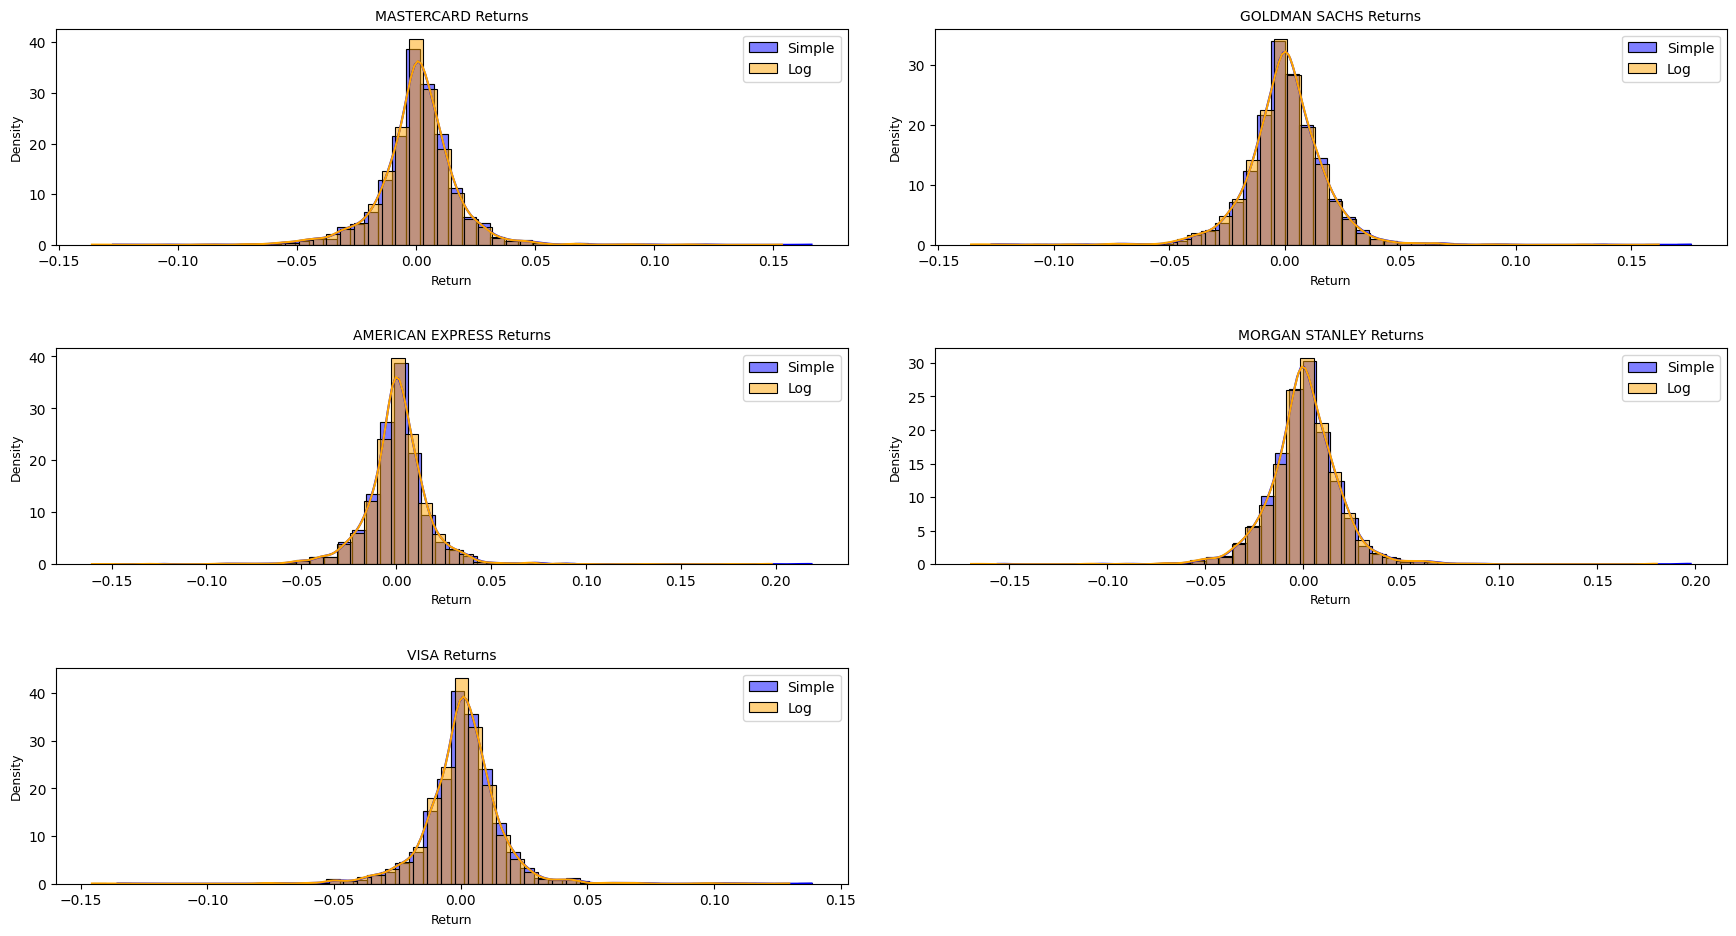

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))  # Increased width and height

for i, company in enumerate(['MASTERCARD', 'GOLDMAN SACHS', 'AMERICAN EXPRESS', 'MORGAN STANLEY', 'VISA'], 1):
    plt.subplot(3, 2, i)  # Adjusted for a 3x2 grid
    sns.histplot(df_simple_returns[company], color='blue', label='Simple', kde=True, stat='density', bins=50)
    sns.histplot(df_log_returns[company], color='orange', label='Log', kde=True, stat='density', bins=50)
    plt.title(f'{company} Returns', fontsize=10)
    plt.xlabel('Return', fontsize=9)
    plt.ylabel('Density', fontsize=9)
    plt.legend()

plt.tight_layout(pad=3.0)
plt.show()

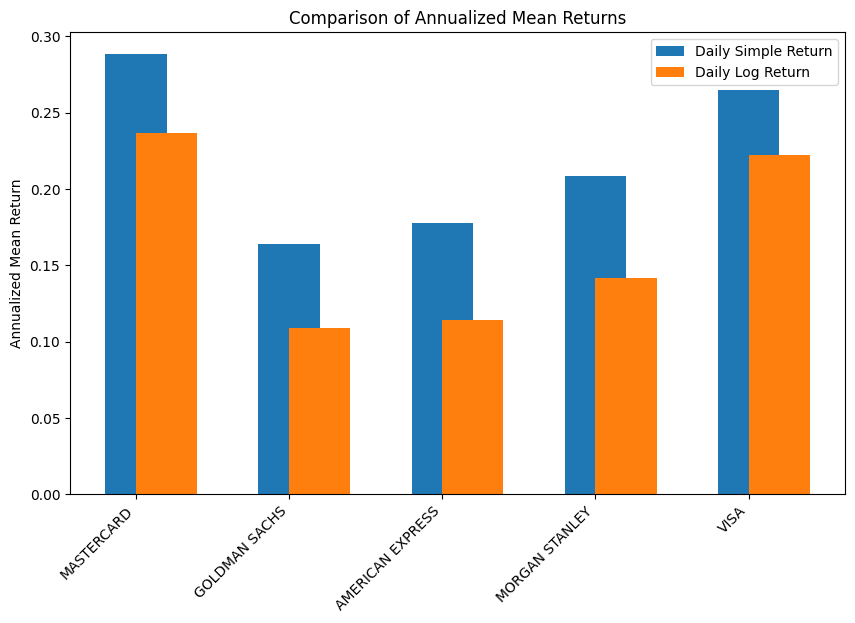

In [229]:
import matplotlib.pyplot as plt

# We'll select the statistics by using the .loc accessor
annualized_mean_daily = df_descriptive_daily_stats.loc['Annualized Mean']
annualized_mean_log = df_descriptive_log_stats.loc['Annualized Mean']

# Now you can plot these using a bar chart, for example
fig, ax = plt.subplots(figsize=(10, 6))

company_names = df_descriptive_daily_stats.columns

# We'll plot the daily and log means side by side for each company
x = range(len(company_names))
ax.bar(x, annualized_mean_daily, width=0.4, label='Daily Simple Return', align='center')
ax.bar(x, annualized_mean_log, width=0.4, label='Daily Log Return', align='edge')

# Set the company names as the x-tick labels
ax.set_xticks(x)
ax.set_xticklabels(company_names, rotation=45, ha='right')

# Add some labels and a legend
ax.set_ylabel('Annualized Mean Return')
ax.set_title('Comparison of Annualized Mean Returns')
ax.legend()

plt.show()


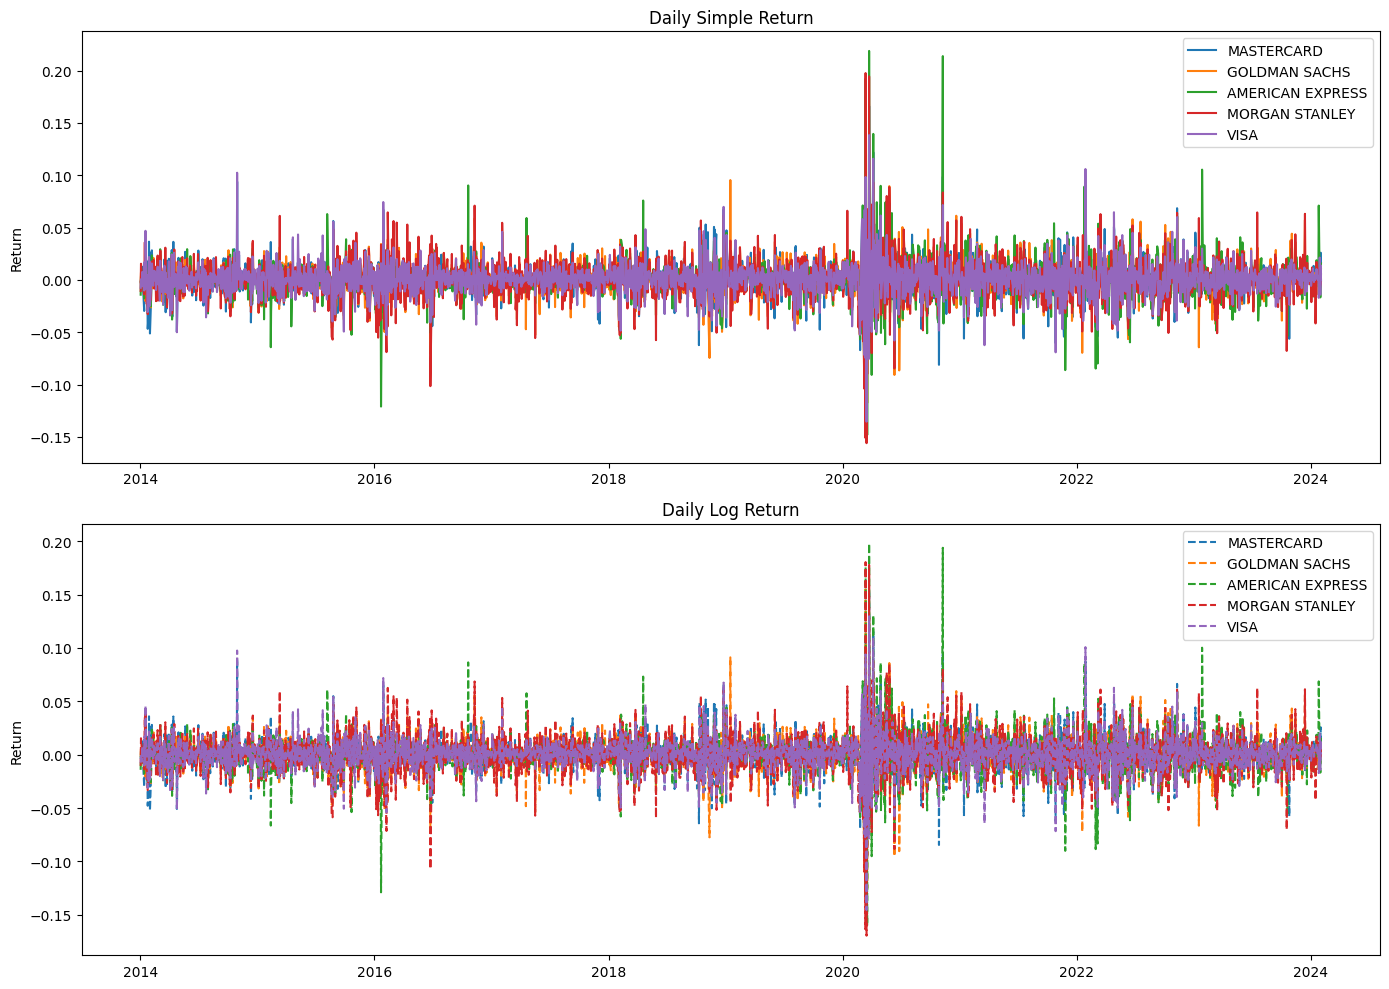

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot both returns
plt.figure(figsize=(14, 10))

# Simple Returns
plt.subplot(2, 1, 1)
for company in df_simple_returns.columns:
    plt.plot(df_simple_returns.index, df_simple_returns[company], label=company)
plt.title('Daily Simple Return')
plt.ylabel('Return')
plt.legend()

# Log Returns
plt.subplot(2, 1, 2)
for company in df_log_returns.columns:
    plt.plot(df_log_returns.index, df_log_returns[company], label=company, linestyle='--')
plt.title('Daily Log Return')
plt.ylabel('Return')
plt.legend()

plt.tight_layout()
plt.show()




Weekly returns

In [231]:
# Calculate the weekly simple returns for all companies
df_weekly_prices = df_simple_returns.resample('W-MON').last()

# Calculate the weekly log returns for all companies
df_weekly_log_returns = df_log_returns.resample('W-MON').last()

# Number of trading days in a year
trading_weeks = 52

# Initialize a dictionary to store the descriptive statistics
descriptive_stats_weekly = {}

# Calculate descriptive statistics for daily returns
for company in ['MASTERCARD', 'GOLDMAN SACHS', 'AMERICAN EXPRESS', 'MORGAN STANLEY', 'VISA']:
    returns = df_weekly_prices[f'{company}']
    descriptive_stats_weekly[company] = {
        'Annualized Weekly Mean': returns.mean() * trading_weeks,
        'Annualized Weekly Variance': returns.var() * trading_weeks,
        'Skewness': returns.skew(),
        'Kurtosis': returns.kurtosis(),
        'Min': returns.min(),
        'Max': returns.max()
    }

# Convert the dictionary to a DataFrame for easier viewing
df_descriptive_weekly_simple_stats = pd.DataFrame(descriptive_stats_weekly)

df_descriptive_weekly_simple_stats

,MASTERCARD,GOLDMAN SACHS,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Annualized Weekly Mean,-0.022261,0.064107,0.012974,0.007012,-0.027472
Annualized Weekly Variance,0.016085,0.014604,0.021767,0.018340,0.014136
Skewness,-0.264410,-1.154313,1.739187,-1.128653,-0.825445
Kurtosis,12.427841,11.030625,31.094795,12.956286,15.022858
Min,-0.127255,-0.127053,-0.137851,-0.156000,-0.135472
Max,0.121967,0.076907,0.213879,0.093353,0.115838


In [232]:
# Initialize a dictionary to store the descriptive statistics
descriptive_stats_log_weekly = {}

# Calculate descriptive statistics for daily returns
for company in ['MASTERCARD', 'GOLDMAN SACHS', 'AMERICAN EXPRESS', 'MORGAN STANLEY', 'VISA']:
    returns = df_weekly_log_returns[f'{company}']
    descriptive_stats_log_weekly[company] = {
        'Annualized Weekly Mean': returns.mean() * trading_weeks,
        'Annualized Weekly Variance': returns.var() * trading_weeks,
        'Skewness': returns.skew(),
        'Kurtosis': returns.kurtosis(),
        'Min': returns.min(),
        'Max': returns.max()
    }

# Convert the dictionary to a DataFrame for easier viewing
df_descriptive_weekly_log_stats = pd.DataFrame(descriptive_stats_log_weekly)

df_descriptive_weekly_log_stats

,MASTERCARD,GOLDMAN SACHS,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Annualized Weekly Mean,-0.030343,0.056689,0.002302,-0.002295,-0.034624
Annualized Weekly Variance,0.016243,0.014904,0.021235,0.018823,0.014408
Skewness,-0.641336,-1.464963,0.892535,-1.542052,-1.236994
Kurtosis,12.766644,12.959447,25.754804,15.707238,16.406137
Min,-0.136111,-0.135881,-0.148328,-0.169603,-0.145571
Max,0.115084,0.074093,0.193821,0.089249,0.109606


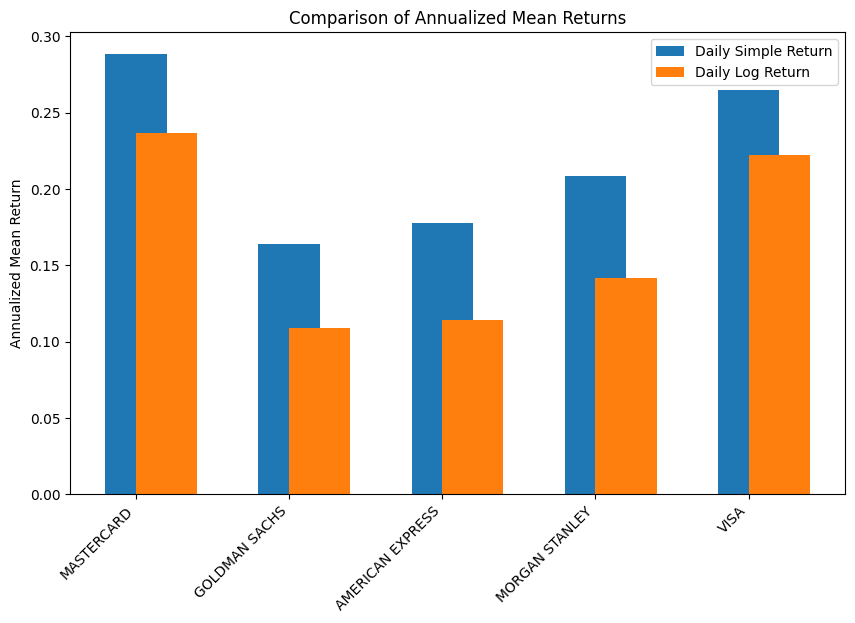

In [233]:
import matplotlib.pyplot as plt

# We'll select the statistics by using the .loc accessor
annualized_mean_weekly = df_descriptive_daily_stats.loc['Annualized Mean']
annualized_mean_log_weekly = df_descriptive_log_stats.loc['Annualized Mean']

# Now you can plot these using a bar chart, for example
fig, ax = plt.subplots(figsize=(10, 6))

company_names = df_descriptive_daily_stats.columns

# We'll plot the daily and log means side by side for each company
x = range(len(company_names))
ax.bar(x, annualized_mean_weekly, width=0.4, label='Daily Simple Return', align='center')
ax.bar(x, annualized_mean_log_weekly, width=0.4, label='Daily Log Return', align='edge')

# Set the company names as the x-tick labels
ax.set_xticks(x)
ax.set_xticklabels(company_names, rotation=45, ha='right')

# Add some labels and a legend
ax.set_ylabel('Annualized Mean Return')
ax.set_title('Comparison of Annualized Mean Returns')
ax.legend()

plt.show()

In [234]:
print(df_descriptive_log_stats["MASTERCARD"])
print(df_descriptive_weekly_log_stats["MASTERCARD"])



Annualized Mean        0.236735
Annualized Variance    0.103148
Skewness               0.024725
Kurtosis               9.204230
Min                   -0.136111
Max                    0.153673
Name: MASTERCARD, dtype: float64
Annualized Weekly Mean        -0.030343
Annualized Weekly Variance     0.016243
Skewness                      -0.641336
Kurtosis                      12.766644
Min                           -0.136111
Max                            0.115084
Name: MASTERCARD, dtype: float64


In [235]:

print(df_descriptive_log_stats)
print(df_descriptive_weekly_log_stats)

                     MASTERCARD  GOLDMAN SACHS  AMERICAN EXPRESS  \
Annualized Mean        0.236735       0.108588          0.113990   
Annualized Variance    0.103148       0.110497          0.127510   
Skewness               0.024725      -0.195256          0.509943   
Kurtosis               9.204230      10.084463         20.352364   
Min                   -0.136111      -0.135881         -0.160388   
Max                    0.153673       0.161951          0.197885   

                     MORGAN STANLEY       VISA  
Annualized Mean            0.141933   0.222609  
Annualized Variance        0.132964   0.084867  
Skewness                  -0.011683   0.021433  
Kurtosis                  12.189573  10.210001  
Min                       -0.169603  -0.145571  
Max                        0.180403   0.129647  
                            MASTERCARD  GOLDMAN SACHS  AMERICAN EXPRESS  \
Annualized Weekly Mean       -0.030343       0.056689          0.002302   
Annualized Weekly Variance    